In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dt = torch.tensor(0.01)
t0 = torch.tensor(0.0)
tf = torch.tensor(3.0)
t = torch.arange(t0,tf,dt)


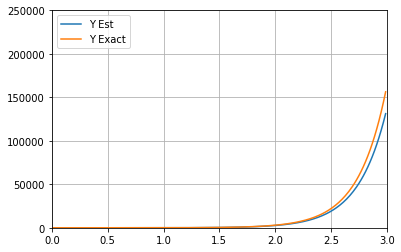

In [10]:
A = torch.tensor( ((1.0, 0.0, 0.0), (4.0, -1.0, 0.0), (4.0, dt/2.0, dt/2.0-1.0)) ) 

log_y = []
log_y_exact = []
y_in = torch.tensor( (1.0,) )
for i in range(len(t)-1):
    # print(y_in)
    log_y.append(y_in.clone().item())
    
    B = torch.tensor( ((y_in.item(), ), (0.0, ), (0.0, )) )
    X = torch.linalg.solve(A,B)
    y_in = X[0] + dt/2.0*(X[1]+X[2])
    
    y_exact = torch.exp(4*t[i])
    log_y_exact.append(y_exact)
    
    # print('Frame')
    # print(A)
    # print(B)
    # print(X)
    # print()
    # break
    
fig, ax = plt.subplots()
ax.plot(t[0:-1], log_y)
ax.plot(t[0:-1], log_y_exact)
ax.grid(True)
ax.set_ylim([0,2.5e5])
ax.set_xlim([0, 3])

ax.legend(['Y Est','Y Exact'], loc='upper left')

